<a href="https://colab.research.google.com/github/phylodasha/men_women_prose_and_canon_19_century/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22MenWomen_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tqdm


In [ ]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
import json
import time
from os.path import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files


In [ ]:

men_dataset = pd.read_csv('Men_metadata.csv', sep = ';')
women_dataset = pd.read_csv('Women_metadata.csv')

In [ ]:
men_dataset

,filename,author,author_birth_year,author_death_year,realname,title,source_title,colophon,first_book_publication,edition_year,firstprint_description,year,Unnamed: 12
0,garin_mikhaylovskiy.v_sutoloke_provintsialnoy_...,"Гарин-Михайловский, Николай Георгиевич",1852,1906,"Михайловский, Николай Егорович (Георгиевич)",В сутолоке провинциальной жизни,Собрание сочинений. [Подготовка текста и приме...,"М.: Гослитиздат, 1957",1896,1957.0,Нижегородский листок. 1896. № 204 (26 июля),1896,6
1,leskov.soboryane.txt,"Лесков, Николай Семёнович",1831,1895,NaN,Соборяне,Собрание сочинений. Н.С. Лесков. Лесков. 1831-...,"М.: Правда, 1989",1872,1989.0,Соборяне. Старогородская хроника. [Соч.] Н. Ле...,1872,7
2,markevich.zabytyy_vopros.old.txt,"Маркевич, Болеслав Михайлович",1822,1884,NaN,Забытый вопросъ,Полное собрание сочинений Б.М. Маркевича. Марк...,"СПб.: тип. (б.) А.М.: Котомина, 1885",1872,1885.0,Русский вестник. 1872. № 1−4,1872,7
3,stanyukovich.pokhozhdeniya_odnogo_blagonameren...,"Станюкович, Константин Михайлович",1843,1903,NaN,Похождения одного благонамеренного,Избранные произведения. К.М. Станюкович. Станю...,"М.: Худож. лит., 1988",1879,1988.0,Дело. 1879. № 6—8,1879,8
4,reshetnikov.gornorabochiye.txt,"Решетников, Фёдор Михайлович",1841,1871,NaN,Горнорабочие,"Повести и рассказы. Ф. М. Решетников. [Сост., ...","М.: Сов. Россия, 1986",1861,1986.0,Современник. 1866. № 1,1861,9
5,bestuzhev_marlinskiy.mulla_nur.txt,"Бестужев, Александр Александрович",1797,1837,NaN,Мулла-нур,Русские повести и рассказы. Ч. 1-8,"М.: Сов. Россия, 1983",1832-1834,1981.0,Сочинения. А.А. Бестужев-Марлинский. Бестужев-...,1834,10
6,uspenskiyg.nravy_rasteryayevoy_ulitsy.txt,"Успенский, Глеб Иванович",1843,1902,NaN,Нравы растеряевой улицы,Собрание сочинений. В 9 т.. [Под общ. ред. В.П...,"М.: Гослитиздат., [Ленингр. отд-ние], 1955",1866,1955.0,Очерки и рассказы. [Соч.] Г.И. Успенского. СПб...,1866,11
7,yelpatyevskiy.ocherki_sibiri.old.txt,"Елпатьевский, Сергей Яковлевич",1854,1933,NaN,Очерки Сибири,Очерки Сибири,"М.: ред. журн. Русское богатство, 1897",1897,1897.0,"Очерки Сибири, М.: ред. журн. Русское богатств...",1897,14
8,leskov.zagadochnyy_chelovek.txt,"Лесков, Николай Семёнович",1831,1895,NaN,Загадочный человек,Собрание сочинений. Под общ. ред. В.Г. Базанов...,"М.: Гослитиздат., [Ленингр. отд-ние], 1956",1871,1957.0,Загадочный человек. Эпизод из истории комич. в...,1871,16
9,mamin_sibiryak.sestry.txt,"Мамин-Сибиряк, Дмитрий",1852,1912,"Мамин, Дмитрий Наркисович",Сестры,Собрание сочинений. [Под общ. ред. А.И. Грузде...,"М.: Правда, 1958",1883,1958.0,Собрание сочинений. [Под общ. ред. А.И. Грузде...,1883,17


In [ ]:
save_path = '/Users/darakorotkova/Desktop/Women_text'

In [ ]:
def get_files_from_drive(path, metadata1, path_to_file):
  texts = []

  for one_name in metadata1['filename']:

    try:
      with open(path+one_name, 'r') as f:

        texts.append(f.read())

    except Exception:
      texts.append('Нет текста')
    
  return texts

In [ ]:
men_dataset["TEXT"]=get_files_from_drive('/content/drive/MyDrive/txt/', men_dataset, '/Users/darakorotkova/Desktop/Men_text')
women_dataset["TEXT"]=get_files_from_drive('/content/drive/MyDrive/txt/', women_dataset, '/Users/darakorotkova/Desktop/Women_text')

In [ ]:
women_dataset

# Предобработка

In [ ]:
def print_not_alpha(text):
  
  punct = []
  for i in text:
    if i.isalpha() == False and i != ' ':
      punct.append(i)
  return list(set(punct))

In [ ]:
punct = men_dataset['TEXT'].apply(print_not_alpha) + women_dataset['TEXT'].apply(print_not_alpha)

In [ ]:
my_punct = []
for i in punct:
  my_punct.extend(set(i))



In [ ]:
my_punct = set(my_punct)

In [ ]:
my_punct.remove('.')
my_punct.remove(',')
my_punct.remove('?')
my_punct.remove('!')


In [ ]:
def delete_my_punct(text, punct = my_punct):
  for i in punct:
    try:
      text = text.replace(i, ' ')
    except Exception:
      pass
  return text

In [ ]:
def delete_spaces(text):
  text = text.split(' ')
  text = [i for i in text if i]
  return ' '.join(text)

In [ ]:
men_dataset['Text_without_punct'] = men_dataset['TEXT'].apply(delete_my_punct)
women_dataset['Text_without_punct'] = women_dataset['TEXT'].apply(delete_my_punct)

In [ ]:
men_dataset['Text_without_punct'] = men_dataset['Text_without_punct'].apply(delete_spaces)
women_dataset['Text_without_punct'] = women_dataset['Text_without_punct'].apply(delete_spaces)

In [ ]:
men_dataset.loc[29, ['Text_without_punct']]

Text_without_punct    Н. Э. Гейнце Аракчеев Часть первая НЕРАВНЫЙ БР...
Name: 29, dtype: object

# **Грамматические признаки текстов**

Пунктуация

In [ ]:
def count_punctuation(text):


  n_dots = text.count('.')
 
  n_commas = text.count(',')
  n_exclamation = text.count('!')
  n_questions = text.count('?')
  n_three_dots = text.count('...')
  n_punctuation = n_dots+n_commas+n_exclamation+n_questions+n_three_dots
  return [n_dots*100/len(text),  n_commas*100/len(text), n_exclamation*100/len(text), n_questions*100/len(text), n_three_dots*100/len(text)]

In [ ]:
punct_men = list(men_dataset['Text_without_punct'].apply(count_punctuation))
punct_men = pd.DataFrame(punct_men, columns = ['Dots', 'Commas', 'Exclamation', 'Question', 'Three dots'])

In [ ]:
punct_women = list(women_dataset['Text_without_punct'].apply(count_punctuation))
punct_women = pd.DataFrame(punct_women, columns = ['Dots', 'Commas', 'Exclamation', 'Question', 'Three dots'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f915f0e6d90>,
      dtype=object)

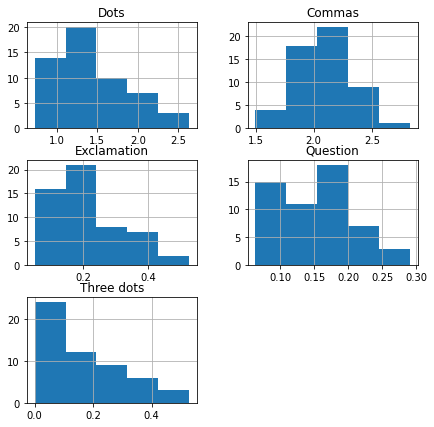

In [ ]:
punct_men.hist(bins = 5, figsize = (7,7))

In [ ]:
from scipy.stats import mannwhitneyu

In [ ]:
def count_mann_whitney(name_column, table1, table2):
  stat, p = mannwhitneyu(table1[name_column], table2[name_column])
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  alpha = 0.05
  if p > alpha:
    print('Same distribution (fail to reject H0)')
  else:
    print('Different distribution (reject H0)')

In [ ]:
count_mann_whitney('Commas', punct_women, punct_men)

Statistics=1420.000, p=0.409
Same distribution (fail to reject H0)


In [ ]:
count_mann_whitney('Dots', punct_women, punct_men)

Statistics=882.000, p=0.000
Different distribution (reject H0)


In [ ]:
count_mann_whitney('Exclamation', punct_women, punct_men)

Statistics=1357.000, p=0.268
Same distribution (fail to reject H0)


In [ ]:
count_mann_whitney('Question', punct_women, punct_men)

Statistics=1331.000, p=0.218
Same distribution (fail to reject H0)


In [ ]:
count_mann_whitney('Three dots', punct_women, punct_men)

Statistics=976.500, p=0.002
Different distribution (reject H0)


In [ ]:
print('Стандартное отклонение от среднего в женских текстах. Точки', punct_women['Dots'].std())
print('Стандартное отклонение от среднего в мужских текстах. Точки', punct_men['Dots'].std())
print('Стандартное отклонение женского от мужского. Точки', pd.Series([punct_women['Dots'].mean(), punct_men['Dots'].mean()]).std())


Стандартное отклонение от среднего в женских текстах. Точки 0.3606255096348666
Стандартное отклонение от среднего в мужских текстах. Точки 0.46394525078182497
Стандартное отклонение женского от мужского. Точки 0.20656374267568645


In [ ]:
print('Стандартное отклонение от среднего в женских текстах. Запятые', punct_women['Commas'].std())
print('Стандартное отклонение от среднего в мужских текстах. Запятые', punct_men['Commas'].std())
print('Стандартное отклонение женского от мужского. Запятые', pd.Series([punct_women['Commas'].mean(), punct_men['Commas'].mean()]).std())


Стандартное отклонение от среднего в женских текстах. Запятые 0.18596229473291415
Стандартное отклонение от среднего в мужских текстах. Запятые 0.24428339257718132
Стандартное отклонение женского от мужского. Запятые 0.019346809819935463


In [ ]:
print('Стандартное отклонение от среднего в женских текстах. Восклицательные знаки', punct_women['Exclamation'].std())
print('Стандартное отклонение от среднего в мужских текстах. Восклицательные знаки', punct_men['Exclamation'].std())
print('Стандартное отклонение женского от мужского. Восклицательные знаки', pd.Series([punct_women['Exclamation'].mean(), punct_men['Exclamation'].mean()]).std())


Стандартное отклонение от среднего в женских текстах. Восклицательные знаки 0.12009353244221224
Стандартное отклонение от среднего в мужских текстах. Восклицательные знаки 0.11148543048317801
Стандартное отклонение женского от мужского. Восклицательные знаки 0.005300393580278556


In [ ]:
print('Стандартное отклонение от среднего в женских текстах. Вопросительные знаки', punct_women['Question'].std())
print('Стандартное отклонение от среднего в мужских текстах. Вопросительные знаки', punct_men['Question'].std())
print('Стандартное отклонение женского от мужского. Вопросительные знаки', pd.Series([punct_women['Question'].mean(), punct_men['Exclamation'].mean()]).std())


Стандартное отклонение от среднего в женских текстах. Вопросительные знаки 0.055997530584570444
Стандартное отклонение от среднего в мужских текстах. Вопросительные знаки 0.055844117503974146
Стандартное отклонение женского от мужского. Вопросительные знаки 0.047047138076088374


In [ ]:
print('Стандартное отклонение от среднего в женских текстах. Троеточия', punct_women['Three dots'].std())
print('Стандартное отклонение от среднего в мужских текстах. Троеточия', punct_men['Three dots'].std())
print('Стандартное отклонение женского от мужского. Троеточия', pd.Series([punct_women['Three dots'].mean(), punct_men['Exclamation'].mean()]).std())


Стандартное отклонение от среднего в женских текстах. Троеточия 0.08506790882097597
Стандартное отклонение от среднего в мужских текстах. Троеточия 0.13268913482296854
Стандартное отклонение женского от мужского. Троеточия 0.07994659083901307


In [ ]:
def count_mean(table):
  d = {}
  for i in list(table):
    d[i] = table[i].mean()
  return d

In [ ]:
d_men = count_mean(punct_men)
d_men

{'Commas': 2.07969595860489,
 'Dots': 1.4184200055925889,
 'Exclamation': 0.2112631363590962,
 'Question': 0.15219265346843544,
 'Three dots': 0.1686253460134282}

In [ ]:
d_women = count_mean(punct_women)
d_women

{'Commas': 2.0523354377688845,
 'Dots': 1.126294759206087,
 'Exclamation': 0.20376724787195097,
 'Question': 0.14472843562105236,
 'Three dots': 0.09820158332907128}

**Длина предложений**

In [ ]:
import string

In [ ]:
def split_text(text):
  text = text.replace('!', '.')
  text = text.replace('?', '.')
  text = text.replace('...', '.')
  text = text.replace(',', '')
  text = text.split('.')
  for i in range(len(text)):
    
    text[i] = text[i].strip()
    text[i] = text[i].rstrip()
    text[i] = [ch for ch in text[i].split(' ') if ch]
    text[i] = ' '.join(text[i])
  return text

In [ ]:
men_dataset['splitted_by_comma_text'] = men_dataset['Text_without_punct'].apply(split_text)
women_dataset['splitted_by_comma_text'] = women_dataset['Text_without_punct'].apply(split_text)

In [ ]:
list(men_dataset['splitted_by_comma_text'])[0]

['Н',
 'Г',
 'Гарин Михайловский В сутолоке провинциальной жизни I Мои записки о деревне напечатанные под заглавием Несколько лет в деревне относятся к периоду до года',
 'После трех описанных мною пожаров я потерял большую часть своего оборотного капитала и не желая вести дело на занятой решил снова заняться своим инженерным делом а имение поручить управляющему некоему Петру Ивановичу Иванову',
 'Выбор Петра Ивановича был сделан мною не вполне самостоятельно рекомендовал мне его Чеботаев как человека стойкого и умеющего подобрать распущенные мною вожжи',
 'То что все случившееся со мной произошло на этой именно почве в этом не сомневался никто',
 'Мне кажется что с вами случилось утешал меня тогда Чеботаев нечто в таком роде',
 'Позвали вы человека и сказали ему Вот тебе рубль',
 'За что',
 'Так ни за что',
 'Спасибо',
 'И на другой день позвали и дали и на третий и на четвертый и так далее приучив себя давать а их брать',
 'И в один прекрасный день когда вместо рубля вы дали им полти

In [ ]:
def count_len_of_sentence(text):
  lens = 0
  new_sentences = []
  for sentence in text:
    sentence = sentence.split(' ')
    if len(sentence) > 2:
      lens+=len(sentence)
      new_sentences.append(sentence)

  return lens/len(new_sentences)

In [ ]:
men_dataset['avg_len_sentence'] = men_dataset['splitted_by_comma_text'].apply(count_len_of_sentence)
women_dataset['avg_len_sentence'] = women_dataset['splitted_by_comma_text'].apply(count_len_of_sentence)

In [ ]:
print('Средняя длина предложения в женских текстах',women_dataset['avg_len_sentence'].mean())
print('Средняя длина предложения в мужских текстах', men_dataset['avg_len_sentence'].mean())

Средняя длина предложения в женских текстах 15.11571227239291
Средняя длина предложения в мужских текстах 13.577957375742388


In [ ]:
print('Стандартное отклонение между группами')
print(pd.Series([women_dataset['avg_len_sentence'].mean(), men_dataset['avg_len_sentence'].mean()]).std())
print('Стандартное отклонение средней длины предложения в женских текстах', women_dataset['avg_len_sentence'].std())
print('Стандартное отклонение средней длины предложения в мужских текстах', men_dataset['avg_len_sentence'].std())

Стандартное отклонение между группами
1.087356915224403
Стандартное отклонение средней длины предложения в женских текстах 3.191485459694739
Стандартное отклонение средней длины предложения в мужских текстах 2.396353052831202


In [ ]:
def delete_names2_0(text):
  names = []
  new_text = []
  for sentence in text:
    new_sentence = []
    sentence = sentence.split(' ')
    if len(sentence) > 2:
      for word in sentence[1:]:
          if word[0].isupper():
            names.append(word)
          else:
            new_sentence.append(word)
    new_text = new_text + [sentence[0]] + new_sentence
  text = [word for word in new_text if word not in names]
  print(text[:20])
  return text

In [ ]:
men_dataset['splitted_by_words'] = men_dataset['splitted_by_comma_text'].apply(delete_names2_0)


['Г', 'Гарин', 'сутолоке', 'провинциальной', 'жизни', 'записки', 'о', 'деревне', 'напечатанные', 'под', 'заглавием', 'лет', 'в', 'деревне', 'относятся', 'к', 'периоду', 'до', 'года', 'После']
['Н', 'С', 'Лесков', 'житье', 'бытье', 'которых', 'составит', 'предмет', 'этого', 'рассказа', 'суть', 'жители', 'старгородской', 'соборной', 'поповки', 'протоиерей', 'священник', 'и', 'дьякон', 'Годы']
['Маркевичъ', 'вопросъ', 'Впервые', 'напечатанъ', 'въ', 'первыхъ', 'четырехъ', 'книжкахъ', 'за', 'годъ', 'ЧАСТЬ', 'die', 'sie', 'ist', 'kein', 'leerer', 'kann', 'sie', 'üben', 'im']
['Константин', 'одного', 'благонамеренного', 'молодого', 'человека', 'рассказанные', 'им', 'самим', 'прибл', 'уж', 'хотелось', 'мне', 'жить', 'как', 'другие', 'порядочные', 'люди', 'живут', 'чтобы', 'обстановка']
['Ф', 'М', 'Решетников', 'на', 'одной', 'из', 'ветвей', 'гор', 'в', 'тридцати', 'верстах', 'от', 'железоделательного', 'чугуноплавильного', 'и', 'медноплавильного', 'завода', 'далеко', 'в', 'стороне']
['Н', 'Н',

In [ ]:
women_dataset['splitted_by_words'] = women_dataset['splitted_by_comma_text'].apply(delete_names2_0)

['Н', 'Анненская', 'вытянулось', 'почти', 'правильным', 'рядом', 'почерневших', 'и', 'покосившихся', 'от', 'времени', 'изб', 'на', 'берегу', 'речки', 'превращавшейся', 'каждую', 'весну', 'в', 'широкую']
['Н', 'Анненская', 'и', 'сестра', 'один', 'пасмурный', 'октябрьский', 'день', 'около', 'свежей', 'только', 'что', 'зарытой', 'могилы', 'на', 'кладбище', 'стояло', 'двое', 'детей', 'мальчик']
['Н', 'АННЕНСКАЯ', 'крутом', 'берегу', 'маленькой', 'но', 'светлой', 'и', 'быстрой', 'речки', 'лепилась', 'бедная', 'деревушка', 'состоявшая', 'всего', 'из', 'какой', 'нибудь', 'дюжины', 'домиков']
['Александра', 'брат', 'несносно', 'ездить', 'куда', 'нибудь', 'с', 'девочками', 'недовольным', 'голосом', 'заметил', 'тринадцатилетний', 'гимназист', 'расхаживавший', 'давно', 'уже', 'нетерпеливыми', 'шагами', 'по', 'просторной']
['на', 'дворе', 'одного', 'из', 'больших', 'домов', 'затеяли', 'веселую', 'игру', 'Дети', 'человек', 'шесть', 'семь', 'от', 'двенадцати', 'до', 'четырнадцати', 'лет', 'устроили'

**Длина слов**




In [ ]:
def count_len_of_words(text):
  lens = 0
  for i in text:
    lens += len(i)
  return lens/len(text)

In [ ]:
men_dataset['avg_len_of_word'] = men_dataset['splitted_by_words'].apply(count_len_of_words)

In [ ]:
women_dataset['avg_len_of_word'] = women_dataset['splitted_by_words'].apply(count_len_of_words)

In [ ]:
women_dataset['avg_len_of_word'].mean()

5.137145578009238

In [ ]:
men_dataset['avg_len_of_word'].mean()

5.092531533428234

In [ ]:
# women_dataset.to_csv('/content/drive/My Drive/women_dataset.csv')

**Анализ частей речи**

In [ ]:
pip install pymorphy2

     |████████████████████████████████| 55 kB 3.4 MB/s 
     |████████████████████████████████| 8.2 MB 41.7 MB/s 


In [ ]:
import pymorphy2
from collections import Counter


In [ ]:
morph = pymorphy2.MorphAnalyzer()

In [ ]:
def get_morphs(text):
  morphs = []
  print(text[:5])
  for word in text:
    p = morph.parse(word)[0]
    m = str(p.tag)
    m = m.split(',')[0]
    if ' ' in m:
      m = m.split(' ')[0]

    morphs.append(m)

  return Counter(morphs)

In [ ]:
#13 минут
women_dataset['Morphs'] = women_dataset['splitted_by_words'].apply(get_morphs)

['Н', 'Анненская', 'вытянулось', 'почти', 'правильным']
['Н', 'Анненская', 'и', 'сестра', 'один']
['Н', 'АННЕНСКАЯ', 'крутом', 'берегу', 'маленькой']
['Александра', 'брат', 'несносно', 'ездить', 'куда']
['на', 'дворе', 'одного', 'из', 'больших']
['Н', 'Анненская', 'борьба', 'читательницам', 'старшего']
['Александра', 'жизнь', 'Уже', 'двенадцатый', 'час']
['Александра', 'весна', 'Мартовское', 'солнце', 'ярко']
['Надежда', 'в', 'четырех', 'частях', 'Примите']
['Надежда', 'судьбы', 'или', 'любовь', 'происшествие']
['Н', 'Дурова', 'назначена', 'была', 'самая']
['Н', 'Дурова', 'ясный', 'солнечный', 'день']
['Е', 'Ган', 'дворянского', 'собрания', 'был']
['Е', 'Ган', 'света', 'ist', 'dahin']
['З', 'H', 'Гиппиус', 'новелла', 'al']
['Хвощинская', 'Д', 'псевдоним', 'Братец', 'всего']
['Хвощинская', 'Д', 'Пансионерка', 'в', 'шестом']
['H', 'Д', 'Хвощинская', 'борьба', 'записок']
['Кохановская', 'С', 'ГАЙКА', 'такое', 'Житейское']
['Н', 'Кохановская', 'провинциальной', 'галереи', 'портретов']
['Ко

In [ ]:
men_dataset['Morphs'] = men_dataset['splitted_by_words'].apply(get_morphs)

['Г', 'Гарин', 'сутолоке', 'провинциальной', 'жизни']
['Н', 'С', 'Лесков', 'житье', 'бытье']
['Маркевичъ', 'вопросъ', 'Впервые', 'напечатанъ', 'въ']
['Константин', 'одного', 'благонамеренного', 'молодого', 'человека']
['Ф', 'М', 'Решетников', 'на', 'одной']
['Н', 'Н', 'Бестужев', 'нур', 'вахта']
['Глеб', 'городе', 'существует', 'улица', 'Принадлежа']
['С', 'Елпатьевскій', 'Предлагаемые', 'очерки', 'печатались']
['человек', 'событие', 'письмом', 'Лескова', 'к']
['Мамин', 'Н', 'Сестры', 'из', 'жизни']
['и', 'помпадурши', 'наши', 'помпадуры', 'очень']
['Ф', 'королевна', 'первая', 'за', 'тысячу']
['Соловьев', 'Старый', 'дом', 'СВОИ', 'одной']
['Н', 'Лесков', 'краю', 'света', 'первая']
['Н', 'Лесков', 'в', 'трех', 'книгах']
['Кугушев', 'Н', 'Капустину', 'Был', 'у']
['Даниил', 'и', 'реалисты', 'года', 'через']
['Константин', 'мутной', 'воде', 'роман', 'из']
['Иогель', 'вѣчностью', 'и', 'минутой', 'Романъ']
['Иван', 'любовь', 'Анненкову', 'давно', 'разъехались']
['роман', 'братцы', 'старину',

In [ ]:
#women_dataset['Morphs'] = women_dataset['splitted_by_words'].apply(get_morphs)
# women_dataset.to_csv('/content/drive/My Drive/women_dataset.csv')

In [ ]:
def make_percent_morphs(data):
  morphs_percent = []
  for i in range(len(data)):
    d = data.iloc[i]['Morphs'].copy()
    for key in d.keys():
      d[key] = d[key]/len(data.iloc[i]['splitted_by_words'])
    morphs_percent.append(d)
  return morphs_percent

In [ ]:
women_dataset['Morphs_percent'] = make_percent_morphs(women_dataset)
men_dataset['Morphs_percent'] = make_percent_morphs(men_dataset)

In [ ]:
women_morphs = pd.DataFrame(list(women_dataset['Morphs_percent']))
men_morphs = pd.DataFrame(list(men_dataset['Morphs_percent']))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
w_m = pd.DataFrame(women_morphs.mean(), columns = ['Count'])

In [ ]:
m_m = pd.DataFrame(men_morphs.mean(), columns = ['Count'])

In [ ]:
w_m = w_m.sort_values(by = ['Count'])

In [ ]:
m_m = m_m.sort_values(by = ['Count'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


([<matplotlib.patches.Wedge at 0x7f6262689450>,
 [Text(1.0999994294783788, 0.0011203335401362145, 'ROMN'),
  Text(1.0999889842438677, 0.004922859143283942, 'INTJ'),
  Text(1.099863479165088, 0.01732995091937102, 'PRTS'),
  Text(1.0993257548396413, 0.03850824257549373, 'LATN'),
  Text(1.09812608441147, 0.06418023632811985, 'PRED'),
  Text(1.0960489360055032, 0.0931489660769484, 'NUMR'),
  Text(1.0929159170759402, 0.12463867057240681, 'COMP'),
  Text(1.0860595193573623, 0.17457010171634607, 'ADJS'),
  Text(1.0730601439191663, 0.24195439142982755, 'UNKN'),
  Text(1.0548352084476087, 0.31196583630149316, 'PRTF'),
  Text(1.0300218284777245, 0.38607645986178085, 'GRND'),
  Text(0.9623580178102754, 0.5327917468920459, 'INFN'),
  Text(0.7754559333778093, 0.7801718370904904, 'PRCL'),
  Text(0.4301941814071958, 1.0123897304316125, 'ADVB'),
  Text(-0.12238011542723386, 1.0931711244576565, 'NPRO'),
  Text(-0.7349262426708127, 0.8184640601967578, 'PREP'),
  Text(-1.0796698199279866, 0.2105067218325

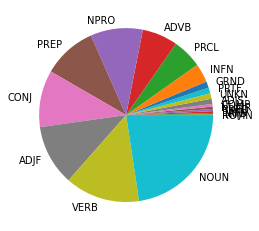

In [ ]:
plt.pie(w_m, labels = [i for i in w_m.index])

([<matplotlib.patches.Wedge at 0x7f626259f310>,
 [Text(1.0999988971584134, 0.0015576425375299484, 'ROMN'),
  Text(1.0999757600540607, 0.0073025539019852, 'INTJ'),
  Text(1.099789941237011, 0.02149616602773739, 'PRTS'),
  Text(1.099107092373226, 0.044312520746091745, 'LATN'),
  Text(1.0977623801812044, 0.0701267185807015, 'COMP'),
  Text(1.0957851948948054, 0.09620190564304633, 'PRED'),
  Text(1.0926286307172537, 0.12713251093618513, 'NUMR'),
  Text(1.0856920496369287, 0.17684109634122125, 'ADJS'),
  Text(1.0731627139174233, 0.24149904649375054, 'PRTF'),
  Text(1.0561797343940513, 0.3073830975432961, 'UNKN'),
  Text(1.0339498411891737, 0.37543005461055284, 'GRND'),
  Text(0.9804796597375511, 0.49865783543521713, 'INFN'),
  Text(0.8215424199940395, 0.7314834599294349, 'PRCL'),
  Text(0.49569955593739273, 0.981978589503596, 'ADVB'),
  Text(-0.01484150789032201, 1.0998998725536528, 'NPRO'),
  Text(-0.6261499508948057, 0.9043982745419368, 'PREP'),
  Text(-1.0469392867638343, 0.3375175992899

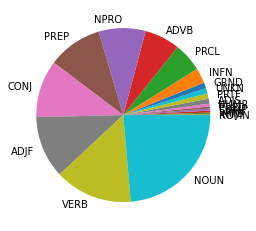

In [ ]:
plt.pie(m_m['Count'], labels = [i for i in m_m.index])

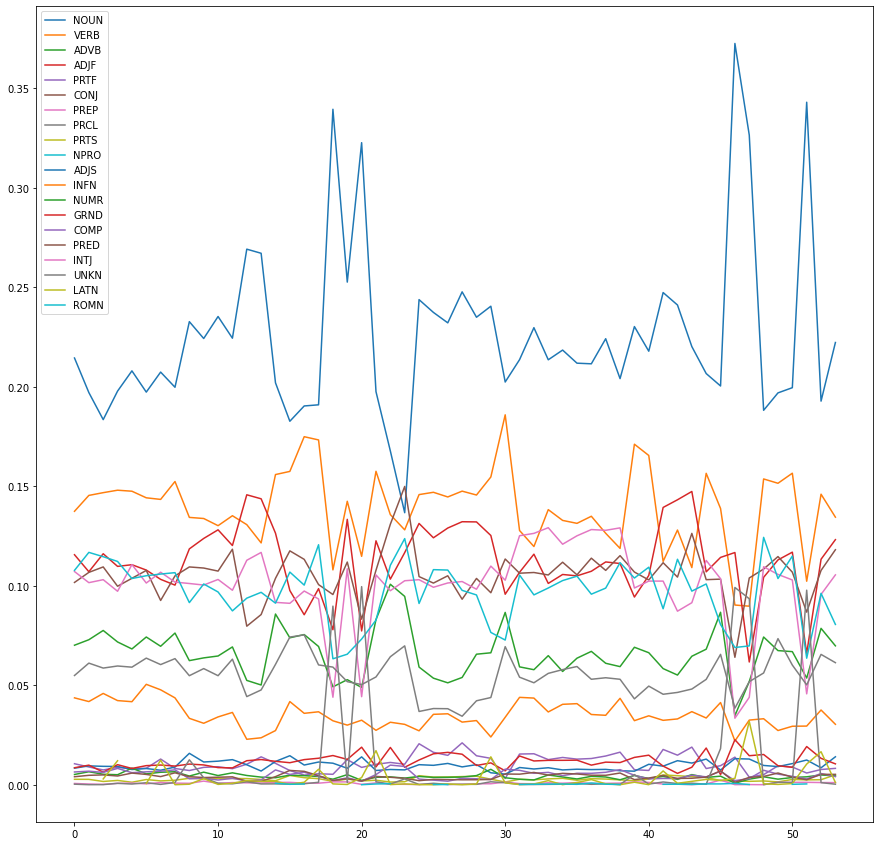

In [ ]:
women_morphs.plot.line(figsize = (15,15))

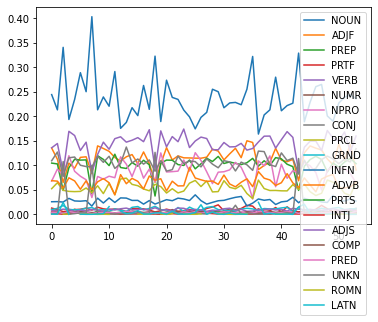

In [ ]:
men_morphs.plot.line()

In [ ]:
count_mann_whitney('NOUN', women_morphs, men_morphs)

Statistics=1221.000, p=0.073
Same distribution (fail to reject H0)


In [ ]:
count_mann_whitney('VERB', women_morphs, men_morphs)

Statistics=1111.000, p=0.017
Different distribution (reject H0)


In [ ]:
count_mann_whitney('ADVB', women_morphs, men_morphs)

Statistics=1430.000, p=0.433
Same distribution (fail to reject H0)


In [ ]:
women_morphs['INTJ'].mean()

0.0007763788669116069

In [ ]:
men_morphs['INTJ'].mean()

0.0012121811083587034

In [ ]:
for i in women_morphs:
  print(i)
  count_mann_whitney(i, women_morphs, men_morphs)

NOUN
Statistics=1221.000, p=0.073
Same distribution (fail to reject H0)
VERB
Statistics=1111.000, p=0.017
Different distribution (reject H0)
ADVB
Statistics=1430.000, p=0.433
Same distribution (fail to reject H0)
ADJF
Statistics=1291.000, p=0.153
Same distribution (fail to reject H0)
PRTF
Statistics=1249.000, p=0.100
Same distribution (fail to reject H0)
CONJ
Statistics=1400.000, p=0.362
Same distribution (fail to reject H0)
PREP
Statistics=1316.000, p=0.192
Same distribution (fail to reject H0)
PRCL
Statistics=1318.000, p=0.196
Same distribution (fail to reject H0)
PRTS
Statistics=1416.000, p=0.399
Same distribution (fail to reject H0)
NPRO
Statistics=980.000, p=0.002
Different distribution (reject H0)
ADJS
Statistics=1383.000, p=0.324
Same distribution (fail to reject H0)
INFN
Statistics=590.000, p=0.000
Different distribution (reject H0)
NUMR
Statistics=1164.000, p=0.036
Different distribution (reject H0)
GRND
Statistics=1241.000, p=0.092
Same distribution (fail to reject H0)
COMP
S

In [ ]:
men_morphs.mean()

NOUN    0.236311
ADJF    0.115788
PREP    0.101372
PRTF    0.009741
VERB    0.144414
NUMR    0.005203
NPRO    0.087166
CONJ    0.106684
PRCL    0.053690
GRND    0.010768
INFN    0.028142
ADVB    0.065993
PRTS    0.002897
INTJ    0.001212
ADJS    0.009328
COMP    0.003772
PRED    0.003798
UNKN    0.009959
ROMN    0.000451
LATN    0.003711
dtype: float64

In [ ]:
from collections import Counter

In [ ]:
Counter(men_morphs)

Counter({'ADJF': 1,
         'ADJS': 1,
         'ADVB': 1,
         'COMP': 1,
         'CONJ': 1,
         'GRND': 1,
         'INFN': 1,
         'INTJ': 1,
         'LATN': 1,
         'NOUN': 1,
         'NPRO': 1,
         'NUMR': 1,
         'PRCL': 1,
         'PRED': 1,
         'PREP': 1,
         'PRTF': 1,
         'PRTS': 1,
         'ROMN': 1,
         'UNKN': 1,
         'VERB': 1})

In [ ]:
get_sorted_morphs(men_morphs.mean())

NameError: ignored

In [ ]:
get_sorted_morphs(women_morphs.mean())

**TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

Проставление меток


In [ ]:
women_dataset['Gender'] = [1 for i in range(len(women_dataset))]
men_dataset['Gender'] = [0 for i in range(len(men_dataset))]

Очистка текста от стоп-слов

In [ ]:
dataset = pd.concat([women_dataset,men_dataset],axis=0)

In [ ]:
!pip install pymorphy2

In [ ]:
from nltk.corpus import stopwords
import pymorphy2

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Удаление стоп-слов

In [ ]:
russian_stopwords = stopwords.words("russian")

In [ ]:
russian_stopwords += ['свой', 'это', 'который', 'сам', 'этот','какой','в','въ', 'тот']

In [ ]:
def delete_stop_words(text):
  return [word for word in text if word not in russian_stopwords]


In [ ]:
dataset['text_for_tf_idf'] = dataset['splitted_by_words'].apply(delete_stop_words)

Приведение слов к нормальной форме

In [ ]:
m = pymorphy2.MorphAnalyzer()

In [ ]:
def normalization(text):
  print(text[:10])
  
  return [m.parse(word)[0].normal_form for word in text]

In [ ]:
def clean_text_for_tf_idf(text):
  for i in range(len(text)):

    
    text[i] = text[i].replace('і', 'и')
    text[i] = text[i].replace('ѣ', 'е')
    text[i] = text[i].replace('ѳ', 'ф')
    try:
      if text[i][-1] == 'ъ':
          text[i] = text[i].replace('ъ', '')
    except Exception:
        pass

  return [word for word in text if word.isalpha()]

In [ ]:
dataset['text_for_tf_idf'] = dataset['text_for_tf_idf'].apply(clean_text_for_tf_idf)

In [ ]:
dataset['text_for_tf_idf'] = dataset['text_for_tf_idf'].apply(normalization)

#Размер словарей

In [ ]:
women_words = []
for i in dataset[dataset['Gender'] == 1]['text_for_tf_idf']:
  women_words += i

In [ ]:
from collections import Counter

In [ ]:
cnt = Counter(women_words).most_common(110)

NameError: ignored

In [ ]:
common_words_w = []
for word in cnt:
  common_words_w.append(word[0])

In [ ]:
men_words = []
for i in dataset[dataset['Gender'] == 0]['text_for_tf_idf']:
  men_words += i

In [ ]:
cnt = Counter(men_words).most_common(110)

In [ ]:
common_words_m = []
for word in cnt:
  common_words_m.append(word[0])

In [ ]:
common_words = np.array([common_words_m, common_words_w])

In [ ]:
common_words = pd.DataFrame(common_words).T

In [ ]:
common_words.columns = ['Men', 'Women']

In [ ]:
dataset.to_csv('/content/drive/My Drive/dataset.csv')

#n-gramms

In [ ]:
def make_ngramms_list(words, n_gramm, count):
  ngramms = []
  for word_i in range(len(words)-(n_gramm-1)):
    ngramm = str()
    for i in range(n_gramm):
      ngramm += words[word_i+i] + ' '
    ngramms.append(ngramm)

  ngramms = Counter(ngramms) 
  
  ngramms = ngramms.most_common(count)
  print(ngramms)
  l_ngramms = []
  for phrase in ngramms:
    l_ngramms.append(phrase[0])
  return l_ngramms


In [ ]:
w_bigramms = make_ngramms_list(women_words, 2, 50)

In [ ]:
w_bigramms

In [ ]:
m_bigramms = make_ngramms_list(men_words, 2, 50)

In [ ]:
bigramms_table = np.array([w_bigramms, m_bigramms])
bigramms_table = pd.DataFrame(bigramms_table).T
bigramms_table.columns = ['Women', 'Men']
bigramms_table.to_csv('bigramms.csv')

In [ ]:
men_vocab = list(set(men_words))

In [ ]:
women_vocab = list(set(women_words))

In [ ]:
common_words = []
women_words = []
men_words = []
for word in women_vocab:
  if word in men_vocab:
    common_words.append(word)
  else:
    women_words.append(word)

In [ ]:
for word in men_vocab:
  if word not in common_words:
    men_words.append(word)

In [ ]:
# dataset = pd.read_csv('/content/drive/My Drive/dataset.csv')

#TF-IDF

In [ ]:
corpus = list(dataset['text_for_tf_idf'])
corpus = [' '.join(i) for i in corpus]

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [ ]:

TF_IDF=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
TF_IDF

,ab,abatere,aber,abgeblüht,abgemacht,abjects,abnegation,abnégation,aborateur,abroad,...,ѣду,ѣдутый,ѣздить,ѣст,ѣсть,ѣхала,ѣхали,ѣхать,ѳеклочок,ѵие
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Линейная регрессия

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
y_train = [0 for _ in range(44)] + [1 for _ in range(44)] 
y_test = [0 for _ in range(10)] + [1 for _ in range(10)] 

In [ ]:
frames_train = TF_IDF[:44], TF_IDF[54:98]
frames_test = TF_IDF[44:54], TF_IDF[98:]
X_train = pd.concat(frames_train)
X_test = pd.concat(frames_test)


In [ ]:
reg = LogisticRegression().fit(X_train,y_train)
accuracy_score(y_test, np.around(reg.predict(X_test)))

0.85

In [ ]:
max_coef = np.argsort(reg.coef_)[0][-30:]

In [ ]:
len(max_coef)

30

In [ ]:
for i in max_coef:
  print(TF_IDF.columns[i])

дьякон
тихо
земля
самый
наш
завод
владыкий
время
начать
промолвить
русский
народ
проговорить
рука
словно
доктор
так
всё
помпадур
бек
генерал
бачок
сказать
голова
бог
дело
он
старик
говорить
человек


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
precision_score(y_test, np.around(reg.predict(X_test)), average='weighted')

0.8535353535353536

In [ ]:
recall_score(y_test, np.around(reg.predict(X_test)), average='weighted')

0.85

In [ ]:
f1_score(y_train, np.around(reg.predict(X_train)), average='weighted')

0.9431744801756426

# Размеры словарей

In [ ]:
women_corp = list(dataset['text_for_tf_idf'])[:54]
men_corp = list(dataset['text_for_tf_idf'])[54:]

In [ ]:
women_corpus = []
for text in women_corp:
  women_corpus = women_corpus + text

men_corpus = []
for text in men_corp:
  men_corpus = men_corpus + text

In [ ]:
from collections import Counter
women_dict = Counter(women_corpus)
pd.DataFrame(pd.Series(women_dict)).sort_values([0]).tail(110)

,0
час,1614
больший,1617
счастие,1635
увидеть,1643
вы,1646
...,...
один,6582
мочь,6752
сказать,8923
который,12382


In [ ]:
men_dict = Counter(men_corpus)
pd.DataFrame(pd.Series(men_dict)).sort_values([0]).tail(110)

,0
свет,1696
брат,1760
нога,1804
муж,1815
немой,1840
...,...
человек,9150
говорить,9457
который,10099
сказать,10719


In [ ]:
size_of_dict_w = len(set(women_corpus))
size_of_dict_m = len(set(men_corpus))


In [ ]:
print(f'Словарный запас мужских текстов: {size_of_dict_m}')
print(f'Словарный запас женских текстов: {size_of_dict_w}')


Словарный запас мужских текстов: 55489
Словарный запас женских текстов: 38313


#Gensim

In [ ]:
import gensim
from gensim import corpora
from gensim.models import Word2Vec


In [ ]:
w2v_model_m = Word2Vec(min_count=10,
                     window=3,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20)

In [ ]:
dataset['Gender'] = [1 for i in range(54)] + [0 for i in range(54)]

In [ ]:
dataset[dataset['Gender'] == 0]

,filename,author,author_birth_year,author_death_year,realname,title,source_title,colophon,first_book_publication,edition_year,firstprint_description,year,TEXT,Text_without_punct,splitted_by_comma_text,avg_len_sentence,splitted_by_words,Gender,Unnamed: 12,text_for_tf_idf
0,garin_mikhaylovskiy.v_sutoloke_provintsialnoy_...,"Гарин-Михайловский, Николай Георгиевич",1852,1906,"Михайловский, Николай Егорович (Георгиевич)",В сутолоке провинциальной жизни,Собрание сочинений. [Подготовка текста и приме...,"М.: Гослитиздат, 1957",1896,1957.0,Нижегородский листок. 1896. № 204 (26 июля),1896,﻿\nН. Г. Гарин-Михайловский\nВ сутолоке провин...,Н. Г. Гарин Михайловский В сутолоке провинциал...,"[Н, Г, Гарин Михайловский В сутолоке провинциа...",14.425031,"[Г, Гарин, сутолоке, провинциальной, жизни, за...",0,6,"[г, гарин, сутолока, провинциальный, жизнь, за..."
1,leskov.soboryane.txt,"Лесков, Николай Семёнович",1831,1895,NaN,Соборяне,Собрание сочинений. Н.С. Лесков. Лесков. 1831-...,"М.: Правда, 1989",1872,1989.0,Соборяне. Старогородская хроника. [Соч.] Н. Ле...,1872,﻿Н.С.Лесков\nСоборяне\nХроника\n\n1872\n\nЧАСТ...,Н.С.Лесков Соборяне Хроника ЧАСТЬ ПЕРВАЯ ГЛАВА...,"[Н, С, Лесков Соборяне Хроника ЧАСТЬ ПЕРВАЯ ГЛ...",15.496063,"[Н, С, Лесков, житье, бытье, которых, составит...",0,7,"[н, с, лесков, житие, бытие, который, составит..."
2,markevich.zabytyy_vopros.old.txt,"Маркевич, Болеслав Михайлович",1822,1884,NaN,Забытый вопросъ,Полное собрание сочинений Б.М. Маркевича. Марк...,"СПб.: тип. (б.) А.М.: Котомина, 1885",1872,1885.0,Русский вестник. 1872. № 1−4,1872,﻿Б. М. Маркевичъ\nЗабытый вопросъ\nРоманъ *).\...,Б. М. Маркевичъ Забытый вопросъ Романъ . Вперв...,"[Б, М, Маркевичъ Забытый вопросъ Романъ, Вперв...",13.525567,"[Маркевичъ, вопросъ, Впервые, напечатанъ, въ, ...",0,7,"[маркевич, вопрос, впервые, напечатать, первый..."
3,stanyukovich.pokhozhdeniya_odnogo_blagonameren...,"Станюкович, Константин Михайлович",1843,1903,NaN,Похождения одного благонамеренного,Избранные произведения. К.М. Станюкович. Станю...,"М.: Худож. лит., 1988",1879,1988.0,Дело. 1879. № 6—8,1879,﻿Константин Михайлович Станюкович\nПохождения ...,Константин Михайлович Станюкович Похождения од...,[Константин Михайлович Станюкович Похождения о...,10.576697,"[Константин, одного, благонамеренного, молодог...",0,8,"[константин, один, благонамеренный, молодой, ч..."
4,reshetnikov.gornorabochiye.txt,"Решетников, Фёдор Михайлович",1841,1871,NaN,Горнорабочие,"Повести и рассказы. Ф. М. Решетников. [Сост., ...","М.: Сов. Россия, 1986",1861,1986.0,Современник. 1866. № 1,1861,﻿Ф. М. Решетников\nГорнорабочие\nРоман \n\n186...,Ф. М. Решетников Горнорабочие Роман Глава I НЕ...,"[Ф, М, Решетников Горнорабочие Роман Глава I Н...",13.802897,"[Ф, М, Решетников, на, одной, из, ветвей, гор,...",0,9,"[ф, м, решетник, один, ветвь, гора, тридцать, ..."
5,bestuzhev_marlinskiy.mulla_nur.txt,"Бестужев, Александр Александрович",1797,1837,NaN,Мулла-нур,Русские повести и рассказы. Ч. 1-8,"М.: Сов. Россия, 1983",1832-1834,1981.0,Сочинения. А.А. Бестужев-Марлинский. Бестужев-...,1834,﻿Н. Н. Бестужев-Марлинский\n \nМулла-нур\nБыл...,Н. Н. Бестужев Марлинский Мулла нур Быль О вах...,"[Н, Н, Бестужев Марлинский Мулла нур Быль О ва...",15.327994,"[Н, Н, Бестужев, нур, вахта, эдыки, падишахи, ...",0,10,"[н, н, бестужев, нур, вахта, эдык, падишах, эг..."
6,uspenskiyg.nravy_rasteryayevoy_ulitsy.txt,"Успенский, Глеб Иванович",1843,1902,NaN,Нравы растеряевой улицы,Собрание сочинений. В 9 т.. [Под общ. ред. В.П...,"М.: Гослитиздат., [Ленингр. отд-ние], 1955",1866,1955.0,Очерки и рассказы. [Соч.] Г.И. Успенского. СПб...,1866,﻿Глеб Иванович Успенский\n\n ...,Глеб Иванович Успенский НРАВЫ РАСТЕРЯЕВОЙ УЛИЦ...,[Глеб Иванович Успенский НРАВЫ РАСТЕРЯЕВОЙ УЛИ...,11.727273,"[Глеб, городе, существует, улица, Принадлежа, ...",0,11,"[глеб, город, существовать, улица, принадлежат..."
7,yelpatyevskiy.ocherki_sibiri.old.txt,"Елпатьевский, Сергей Яковлевич",1854,1933,NaN,Очерки Сибири,Очерки Сибири,"М.: ред. журн. Русское богатство, 

In [ ]:
w2v_model_m.build_vocab(list(dataset[dataset['Gender'] == 0]['text_for_tf_idf']))

w2v_model_m.train(list(dataset[dataset['Gender'] == 0]['text_for_tf_idf']), total_examples=w2v_model_m.corpus_count, epochs=30, report_delay=1)

(14737058, 52731360)

In [ ]:
w2v_model_w = Word2Vec(min_count=10,
                     window=3,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20)

In [ ]:
w2v_model_w.build_vocab(list(dataset[dataset['Gender'] == 1]['text_for_tf_idf']))

w2v_model_w.train(list(dataset[dataset['Gender'] == 1]['text_for_tf_idf']), total_examples=w2v_model_w.corpus_count, epochs=30, report_delay=1)

(14718325, 44598990)

In [ ]:
w2v_model_w.wv.most_similar(['мужчина', 'женщина'])

[('человек', 0.6592117547988892),
 ('девушка', 0.6297475099563599),
 ('влюбляться', 0.6131670475006104),
 ('неглупый', 0.6120619773864746),
 ('замужний', 0.609674870967865),
 ('аристократ', 0.6079385280609131),
 ('разряд', 0.6063679456710815),
 ('высокопоставленный', 0.6020709872245789),
 ('кокетство', 0.5909199118614197),
 ('пригожий', 0.5889937877655029)]

In [ ]:
w2v_model_m.wv.most_similar(['мужчина', 'женщина'])

[('кокетничать', 0.7550475597381592),
 ('влюбиться', 0.7342938780784607),
 ('взрослый', 0.7204945087432861),
 ('недурной', 0.7019120454788208),
 ('кокетка', 0.6798769235610962),
 ('кокетство', 0.6770609617233276),
 ('благовоспитанный', 0.6735477447509766),
 ('очаровательный', 0.6731324195861816),
 ('бесцветный', 0.6638871431350708),
 ('необразованный', 0.6618164777755737)]

In [ ]:
for text in dataset['text_for_tf_idf']:
  if 'он' in text:
    idx = text.index('он')
    print(text[idx-5:idx+5])